<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW#1 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Лукишн Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions (15%)</h1> 

^Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма ЭСС при изменении параметра $\alpha$ от 0 до 1.

Ответ: Предполагая, что ЭСС - это Simple Exponential Smoothing получим следующее. При $\alpha$ стремящимся к единице наибольшее влияние на прогноз оказывает предыдущее значения ряда. В случае же когда $\alpha$ стремится к нулю, прошлое имеет больший вес. То есть в случае маленьких $\alpha$ алгоритм хуже адаптируется к резким изменениям временного ряда $\to$ его адаптивная способность ниже. Другими словами, при изменении параметра $\alpha$ от 0 до 1 адаптивная способность алгоритма ЭСС возрастает.

**Вопрос 2**: Каким следует выбрать параметр сглаживания тренда $\alpha_2$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

Ответ: Параметр $\alpha_1$ отвечает за сглаживание level'a, а параметр $\alpha_2$ за сглаживание тренда.  Тогда в случае с плавно меняющимся трендом параметр $\alpha_2$ нужно выбрать близким к 0, а в случае со стохастически меняющимся трендом близким к 1.

**Вопрос 3**: Докажите  эквивалетность формул расчёта (в рекуррентной форме и в форме корректировки прогноза (correction error form) )скрытых компонент временного ряда в модели Тейла-Вейджа (период сезонность обозначается $p$):
$$l_t = \alpha (y_t - s_{t-p}) + (1-\alpha) (l_{t-1} + b_{t-1} ) \color{red}{=} l_{t-1} + b_{t-1} + \alpha e_t;$$,
    $$ b_t = \beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1} \color{red}{=} b_{t-1} + \alpha\beta e_t;$$,
    $$ s_t = \gamma (y_t-l_t) + (1-\gamma) s_{t-p} \color{red}{=} s_{t-p} + \gamma(1-\alpha)e_t.$$,

Ответ:

Докажем **1ю** формулу. Распишем выражение слева
$$ l_t = \alpha (y_t - s_{t-p}) + (1-\alpha) (l_{t-1} + b_{t-1} ) = l_{t-1} + b_{t-1} + \alpha (y_t - s_{t-p} - l_{t-1} - b_{t-1}) $$
$$ \hat{y_t} = l_{t-1} + b_{t-1} + s_{t-p} $$
Значит,
$$ e_t = y_t - \hat{y_t} = y_t - (l_{t-1} + b_{t-1} + s_{t-p}) $$
Откуда
$$ l_t = l_{t-1} + b_{t-1} + \alpha e_t $$

Добкажем **2ю** формулу.
$$ b_t = \beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1} = b_{t-1} + \beta (l_{t} - l_{t-1} - b_{t-1}) = $$
Подставим выражение для $l_t$ из первой формулы.
$$ = b_{t-1} + \beta (l_{t-1} + b_{t-1} + \alpha e_t - l_{t-1} - b_{t-1}) = b_{t-1} + \alpha \beta e_t $$

Добкажем **3ю** формулу.
$$ s_t = \gamma (y_t-l_t) + (1-\gamma) s_{t-p} = s_{t-p} + \gamma (y_t - l_t - s_{t-p}) = $$
Подставляем выражение для l_t из первой формулы.
$$ = s_{t-p} + \gamma (y_t - l_{t-1} - b_{t-1} - \alpha e_t - s_{t-p}) $$
При выводе первой формулы было получено выражение: 
$$ \hat{y_t} = l_{t-1} + b_{t-1} + s_{t-p} $$
Откуда теперь получаем
$$ s_t = s_{t-p} + \gamma (y_t - \hat{y_t} - \alpha e_t) = s_{t-p} + \gamma (e_t - \alpha e_t) = s_{t-p} + \gamma(1-\alpha)e_t$$

Что и требовалось доказать.


**Вопрос 4**: Выведите формулу расчёта скрытых компонент в форме корректировки прогноза (correction error form) временного ряда в модели ЭС с линейным затухающим трендом (WS with additive damped trend):

$$\hat{y}_{t+d|t} = l_t + \left(\phi + \phi^2 + \dots + \phi^{d}\right) b_t.$$,
   
Скрытые компоненты ВР согласно модели в рекуррентной форме записываются:
    $$ l_{t}       = \alpha y_t + \left(1-\alpha\right) \left(l_{t-1} +\phi b_{t-1}\right),$$,
    $$ b_t         = \beta \left(l_t - l_{t-1}\right) + \left(1-\beta\right)\phi b_{t-1}.$$


Ответ: Из первой формулы получим
$$ \hat{y}_{t|t-1} = l_{t-1} + \phi b_{t-1} $$
То есть, подставляя это выражение в формулу для $l_{t}$:
$$ l_{t} = \alpha y_t + \left(1-\alpha\right) \hat{y}_{t|t-1} = \alpha \left(y_t - \hat{y}_{t|t-1}\right) + \hat{y}_{t|t-1} $$
Так как $e_t = y_t - \hat y_{t|t-1}$, то
$$ l_{t} = \hat{y}_{t|t-1} + \alpha e_t $$

Для $b_t$:
$$ b_t = \beta \left(l_t - l_{t-1}\right) + \left(1-\beta\right)\phi b_{t-1} $$
Подставим полученное выражение для $l_t$.
$$ b_t = \beta \left(\hat{y}_{t|t-1} + \alpha e_t - l_{t-1}\right) + \left(1-\beta\right)\phi b_{t-1} = $$
Раскроем скобки.
$$ = \beta \hat{y}_{t|t-1} + \alpha \beta e_t - \beta l_{t-1} + \phi b_{t-1} - \beta \phi b_{t-1} = \alpha \beta e_t + \phi b_{t-1} = \alpha \beta e_t + \hat{y}_{t|t-1} - l_{t-1} = \alpha \beta e_t + \hat{y}_{t|t-1} - \left( \hat{y}_{t-1|t-2} + \alpha e_{t-1} \right)$$
То есть получаем:
$$ b_t = \hat{y}_{t|t-1} - \hat{y}_{t-1|t-2} + \alpha \beta e_t - \alpha e_{t-1}  $$

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center"> Practice</h1>
#  1. reading data (5%)

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)

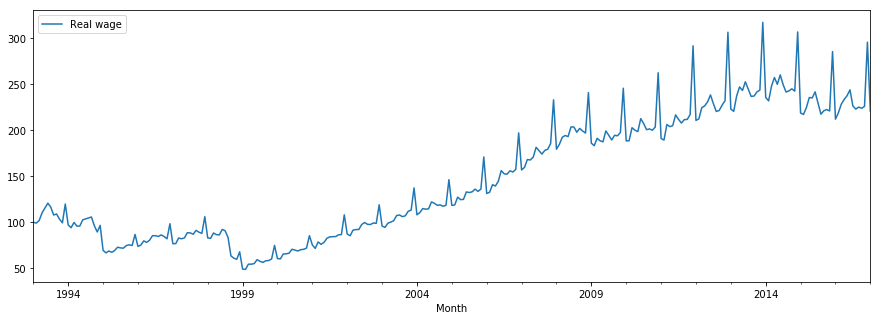

In [3]:
# start with this code
import pandas as pd
import numpy as np
from utils import InitExponentialSmoothing, BuildForecast, plotTSForecast
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualitySSE, qualityMSE, qualityMAPE 

%matplotlib inline


wage = pd.read_csv('./data/monthly-wage.csv', sep=';', decimal='.', index_col=0, parse_dates=True, dayfirst=True)

# Put your code below
wage.plot(figsize=(15,5))

# 2. Build the Forecast with  IES (5%)

You need to apply IES model (see seminar 1) for the TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.


* 0) Forecast Wage TS with SES $\alpha=.1$.
* 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You 
can choose any loss function above).
* 2) Draw the forecast that correspond to IES with optimial value $\alpha$ (use time steps from 09.1998 to 01.2017.)
     Conclude whether IES can be used for this TS? If can not than explain why.
* 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]. (You can choose any Loss function from seminar 1).

## 1) Search for the optimal $\alpha$ 

In [5]:
ALPHA = np.array([0.1])
ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod': 1} for alpha in ALPHA]
FRC_WAGE = BuildForecast(h=1, ts=wage, AlgName="InitExponentialSmoothing", AlgTitle="IES",ParamsArray = ESParamsArray)

In [117]:
# Подберём оптимальный параметр alpha
ALPHA = np.arange(0, 1.001, 0.05)
ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod': 1} for alpha in ALPHA]
FRC_WAGE = BuildForecast(h=1, ts=wage, AlgName="InitExponentialSmoothing", AlgTitle="IES",ParamsArray = ESParamsArray)

# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())

ix = wage.loc['1998-09-01':'2015-01-31'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMSE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

IES {'alpha': 0.25, 'AdaptationPeriod': 1}                     274.461815
IES {'alpha': 0.30000000000000004, 'AdaptationPeriod': 1}      276.793252
IES {'alpha': 0.20000000000000001, 'AdaptationPeriod': 1}      278.055923
IES {'alpha': 0.35000000000000003, 'AdaptationPeriod': 1}      282.300917
IES {'alpha': 0.40000000000000002, 'AdaptationPeriod': 1}      289.763267
IES {'alpha': 0.15000000000000002, 'AdaptationPeriod': 1}      294.934062
IES {'alpha': 0.45000000000000001, 'AdaptationPeriod': 1}      298.574617
IES {'alpha': 0.5, 'AdaptationPeriod': 1}                      308.415513
IES {'alpha': 0.55000000000000004, 'AdaptationPeriod': 1}      319.116818
IES {'alpha': 0.60000000000000009, 'AdaptationPeriod': 1}      330.597975
IES {'alpha': 0.65000000000000002, 'AdaptationPeriod': 1}      342.836386
IES {'alpha': 0.10000000000000001, 'AdaptationPeriod': 1}      351.655739
IES {'alpha': 0.70000000000000007, 'AdaptationPeriod': 1}      355.850676
IES {'alpha': 0.75, 'AdaptationPeriod'

## 2) draw the forecast with optimial value $\alpha $

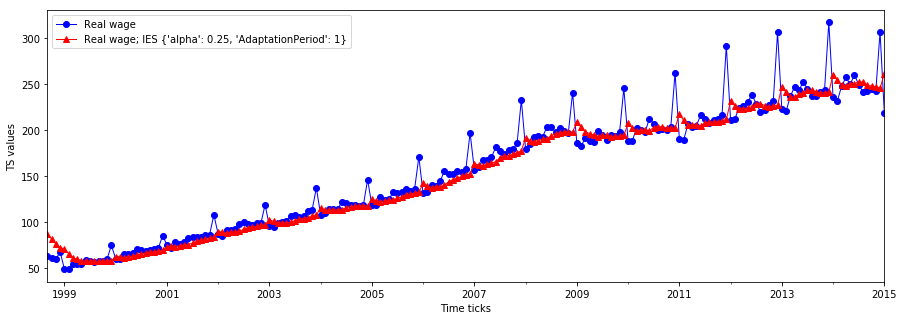

In [12]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2015-01-31'], FRC_WAGE[algName].loc['1998-09-01':'2015-01-31']
               , ts_num=100, alg_title=algName)

** Question**
    * Does SES follow to the TS components?
    
Ответ: В целом да, за трендом следует, но сезонность воспроизводится не очень хорошо.

## 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]

In [118]:
qualityMSE(wage.loc['2015-02-01':'2017-01-31'], FRC_WAGE[algName].loc['2015-02-01':'2017-01-31'])[0]

Real wage    512.496559
dtype: float64

# 3. Winters model for Additive Seasonality (25%)
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of IES: is it better? 
* 5) Conclude whether Winter's ES can be used for this TS?

In [14]:
import math

In [131]:
float(wage.iloc[0])

100.0

In [132]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = np.array([np.NaN]*(T+h))
    
    l= np.NaN
    s= np.array([np.NaN] * p)
    
    for cntr in range(T):
        x_cntr = float(x.iloc[cntr])
        if not math.isnan(x_cntr):
            if math.isnan(l):
                l = x_cntr
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= x_cntr - l
 
            l = alpha * (x_cntr - s[cntr % p]) + (1 - alpha) * l # recurrent smoothing of level 
            s[cntr % p] = delta * (x_cntr - l) + (1 - delta) * s[cntr % p]
            
        FORECAST[cntr+h] = (0 if math.isnan(l) else l) +\
            (0 if math.isnan(s[(cntr + h) % p]) else s[(cntr + h) % p])
    return FORECAST

In [133]:
# Попробуем понять, работает или нет
# Put your code here
forecast = WintersExponentialSmoothing(wage, 1, {'alpha': 0.1, 'delta': 0.3,'seasonality_period': 12})

In [134]:
forecast[:20]

array([          nan,  100.        ,  100.        ,  100.        ,
        100.        ,  100.        ,  100.        ,  100.        ,
        100.        ,  100.        ,  100.        ,  100.        ,
        100.        ,   98.74      ,  101.005     ,  109.1585    ,
        113.23765   ,  116.677885  ,  110.9950965 ,  101.72358685])

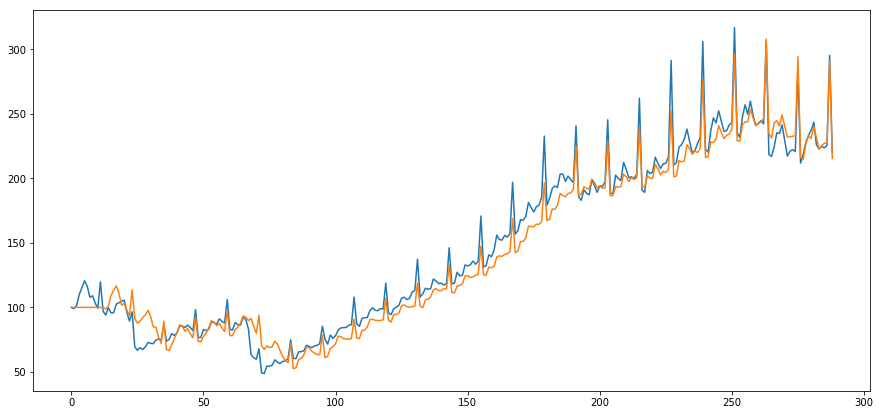

In [135]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15, 7))

loc = wage.loc['1998-09-01':'2015-01-31']

x = np.arange(0, len(wage), 1)

plt.plot(x, wage.iloc[x])
plt.plot(x, forecast[x])

plt.show()

In [136]:
def loss_fun(alpha, delta):
    forecast = WintersExponentialSmoothing(wage, 1, {'alpha': alpha, 'delta': delta, 'seasonality_period': 12})
    x = np.arange(1, len(wage), 1)
    return ((np.array(wage.iloc[x]).ravel() - forecast[x]) ** 2).sum() ** 0.5

In [137]:
#Попробуем подобрать оптимальные alpha и delta

loss_results = []

for alpha in np.arange(0, 1.0001, 0.05):
    for delta in np.arange(0, 1.0001, 0.05):
        loss_results.append(loss_fun(alpha, delta))
        print('alpha: ', alpha, ' delta: ', delta, ' loss: ', loss_fun(alpha, delta))

print('minimum_loss: ', min(loss_results))


alpha:  0.0  delta:  0.0  loss:  1300.35649108
alpha:  0.0  delta:  0.05  loss:  1113.32482654
alpha:  0.0  delta:  0.1  loss:  939.524079079
alpha:  0.0  delta:  0.15  loss:  797.804634058
alpha:  0.0  delta:  0.2  loss:  687.289616104
alpha:  0.0  delta:  0.25  loss:  601.961994964
alpha:  0.0  delta:  0.3  loss:  535.752569839
alpha:  0.0  delta:  0.35  loss:  483.826555578
alpha:  0.0  delta:  0.4  loss:  442.607300888
alpha:  0.0  delta:  0.45  loss:  409.499803075
alpha:  0.0  delta:  0.5  loss:  382.615649157
alpha:  0.0  delta:  0.55  loss:  360.56484733
alpha:  0.0  delta:  0.6  loss:  342.310864114
alpha:  0.0  delta:  0.65  loss:  327.071907636
alpha:  0.0  delta:  0.7  loss:  314.253417957
alpha:  0.0  delta:  0.75  loss:  303.401120664
alpha:  0.0  delta:  0.8  loss:  294.167673902
alpha:  0.0  delta:  0.85  loss:  286.288483136
alpha:  0.0  delta:  0.9  loss:  279.563904381
alpha:  0.0  delta:  0.95  loss:  273.846092134
alpha:  0.0  delta:  1.0  loss:  269.029392446
alph

Оптимальные параметры: $\alpha = 0.35$, $\delta = 0.2$

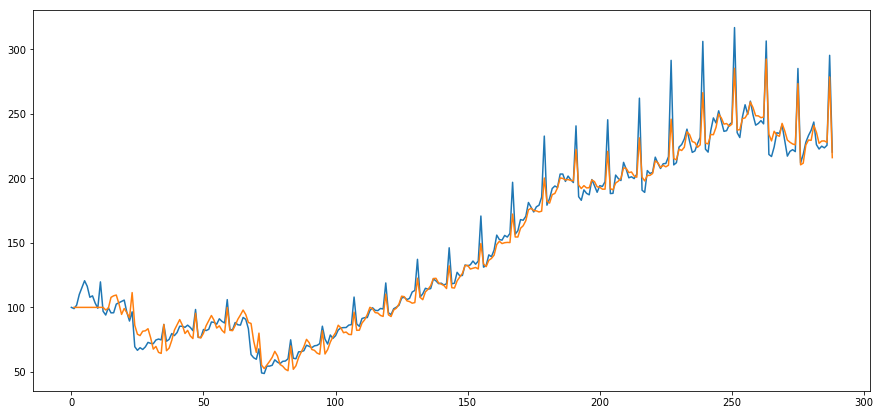

In [138]:
forecast = WintersExponentialSmoothing(wage, 1, {'alpha': 0.35, 'delta': 0.2, 'seasonality_period': 12})

fig = plt.figure(figsize=(15, 7))

x = np.arange(0, len(wage), 1)

plt.plot(x, wage.iloc[x])
plt.plot(x, forecast[x])

plt.show()

На датах в начале прогноз получился очень так себе, поэтому вот вам лучше целиком.

Посчитаем accuracy для периода [02.2015, 01.2017] 

In [105]:
len(wage.loc['2015-02-01':'2017-01-31'])

24

In [139]:
forecast = WintersExponentialSmoothing(wage.loc['2015-02-01':'2017-01-31'],
                                       1, {'alpha': 0.35, 'delta': 0.2, 'seasonality_period': 12})
#print(forecast.shape)
#print(np.array(wage.loc['2015-02-01':'2017-01-31']).ravel().shape)
ix = np.arange(1, len(wage.loc['2015-02-01':'2017-01-31']), 1)
print("Loss: ", ((np.array(wage.loc['2015-02-01':'2017-01-31']).ravel() - forecast[-24:]) ** 2).sum() ** 0.5)


Loss:  128.86147626


Видно, что модель Винтерса прогнозирует этот временной ряд недостаточно качественно. Хотя уже лучше, чем SES.

# 4. Theil-Wage model for TS with linear trend and seasonality (25%)
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [140]:
###################### Theil-Wage model #########################
# x <array Tx1>- time series, 
# d <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - level smoothing parameter
#    beta <scalar in [0,1]> - trend smoothing parameter
#    gamma <scalar in [0,1]> - seasonality smoothing parameter

def TheilWageModel(x, d, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = np.array([np.NaN]*(T+d))
    
    l = np.NaN
    b = np.NaN
    s= np.array([np.NaN] * p)
    
    for cntr in range(T):
        x_cntr = float(x.iloc[cntr])
        if not math.isnan(x_cntr):
            if math.isnan(l):
                l = x_cntr
            if math.isnan(b):
                b = .1
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= 0.7
 
            l_pred = l
            l = alpha * (x_cntr - s[cntr % p]) + (1 - alpha) * (l_pred + b)
            b = beta * (l - l_pred) + (1 - beta) * b
            s[cntr % p] = gamma * (x_cntr - l) + (1 - gamma) * s[cntr % p]
            
        FORECAST[cntr+d] = ((0 if math.isnan(l) else l)  +\
            (0 if math.isnan(b) else b) * d) +\
            (0 if math.isnan(s[(cntr + d) % p]) else s[(cntr + d) % p])
    return FORECAST

In [141]:
# Проверим работоспособность

forecast = TheilWageModel(wage, 1, {'alpha': 0.1, 'beta': 0.2, 
                                                 'gamma': 0.3,'seasonality_period': 12})


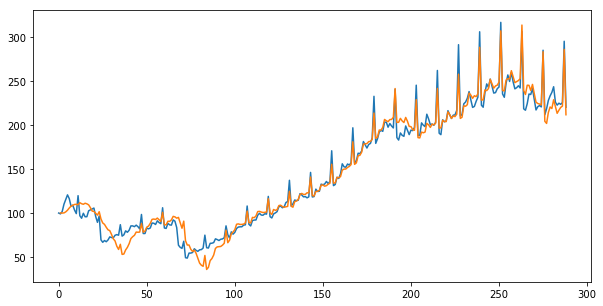

In [142]:
fig = plt.figure(figsize=(10, 5))

x = np.arange(0, len(wage), 1)

plt.plot(x, wage.iloc[x])
plt.plot(x, forecast[x])

plt.show()

In [147]:
def loss_TW(alpha, beta, gamma):
    forecast = TheilWageModel(wage, 1, {'alpha': alpha, 'beta': beta,
                                        'gamma': gamma, 'seasonality_period': 12})
    x = np.arange(1, len(wage), 1)
    return ((np.array(wage.iloc[x]).ravel() - forecast[x]) ** 2).sum() ** 0.5

In [158]:
# Подберём оптимальные параметры alpha, beta и gamma

loss_results = []

ALPHA = np.arange(0, 1.001, 0.1)
BETA = np.arange(0, 1.001, 0.1)
GAMMA = np.arange(0, 1.001, 0.1)
for alpha in ALPHA:
    for beta in BETA:
        for gamma in GAMMA:
            loss_results.append(loss_TW(alpha, beta, gamma))
            print('alpha: ', alpha, ' beta: ', beta, ' gamma: ', gamma, ' loss: ', loss_TW(alpha, beta, gamma))

print('minimum_loss: ', min(loss_results))

alpha:  0.0  beta:  0.0  gamma:  0.0  loss:  1140.74274234
alpha:  0.0  beta:  0.0  gamma:  0.1  loss:  839.040744493
alpha:  0.0  beta:  0.0  gamma:  0.2  loss:  623.739297637
alpha:  0.0  beta:  0.0  gamma:  0.3  loss:  492.932182679
alpha:  0.0  beta:  0.0  gamma:  0.4  loss:  412.089203825
alpha:  0.0  beta:  0.0  gamma:  0.5  loss:  359.968153215
alpha:  0.0  beta:  0.0  gamma:  0.6  loss:  325.056278848
alpha:  0.0  beta:  0.0  gamma:  0.7  loss:  300.905910442
alpha:  0.0  beta:  0.0  gamma:  0.8  loss:  283.772822967
alpha:  0.0  beta:  0.0  gamma:  0.9  loss:  271.466639875
alpha:  0.0  beta:  0.0  gamma:  1.0  loss:  262.749637488
alpha:  0.0  beta:  0.1  gamma:  0.0  loss:  1140.74274234
alpha:  0.0  beta:  0.1  gamma:  0.1  loss:  839.040744493
alpha:  0.0  beta:  0.1  gamma:  0.2  loss:  623.739297637
alpha:  0.0  beta:  0.1  gamma:  0.3  loss:  492.932182679
alpha:  0.0  beta:  0.1  gamma:  0.4  loss:  412.089203825
alpha:  0.0  beta:  0.1  gamma:  0.5  loss:  359.9681532

In [159]:
print('minimum_loss: ', min(loss_results))


minimum_loss:  89.0121050189


Оптимальные параметры: $\alpha = 0.6$, $\beta = 0.0$, $\gamma = 1.0$

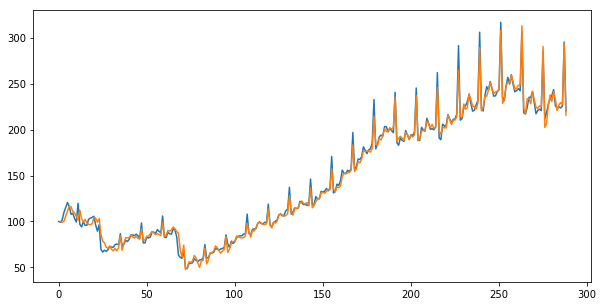

In [163]:
forecast = TheilWageModel(wage, 1, {'alpha': 0.6, 'beta': 0.0, 
                                                 'gamma': 1.0,'seasonality_period': 12})

fig = plt.figure(figsize=(10, 5))

x = np.arange(0, len(wage), 1)

plt.plot(x, wage.iloc[x])
plt.plot(x, forecast[x])

plt.show()


Посчитаем accuracy для случая [2015-02-01:2017-01-31]

In [164]:
forecast = TheilWageModel(wage, 1, {'alpha': 0.6, 'beta': 0.0, 
                                                 'gamma': 1.0,'seasonality_period': 12})
print("Loss: ", ((np.array(wage.loc['2015-02-01':'2017-01-31']).ravel() - forecast[-24:]) ** 2).sum() ** 0.5)


Loss:  154.186544016


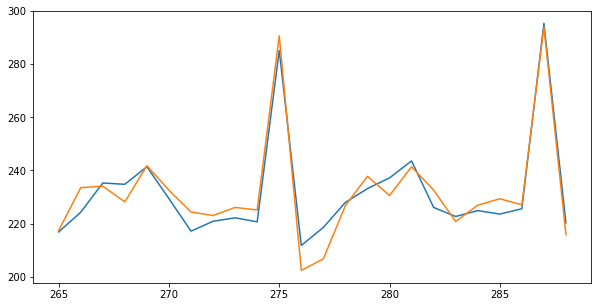

In [192]:
forecast = TheilWageModel(wage, 1, {'alpha': 0.6, 'beta': 0.0, 
                                                 'gamma': 1.0,'seasonality_period': 12})

fig = plt.figure(figsize=(10, 5))

x = np.arange(0, len(wage), 1)

plt.plot(x[-24:], wage.iloc[x][-24:])
plt.plot(x[-24:], forecast[x][-24:])

plt.show()

Судя по loss-функции модель Винтерса подходила для этого случая больше, но если судить по внешнему виду исходного временного ряда и спрогносзированного кажется, что модель Тейла-Вейджа подходит всё-таки больше.

# 5. Non-additive model of ES (25%)
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it by expert opinion (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diveret

Реализую модель Винтерса для случая мультипликативной сезонности.

In [178]:
###################### Winters Multiplicative Model #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    beta <scalar in [0,1]> - seasonality smoothing parameter

def WintersMultModel(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    p = Params['seasonality_period']
    
    FORECAST = np.array([np.NaN]*(T+h))
    
    l= np.NaN
    s= np.array([np.NaN] * p)
    
    for cntr in range(T):
        x_cntr = float(x.iloc[cntr])
        if not math.isnan(x_cntr):
            if math.isnan(l):
                l = x_cntr
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= 0.8
 
            l = alpha * (x_cntr / s[cntr % p]) + (1 - alpha) * l # recurrent smoothing of level 
            s[cntr % p] = beta * (x_cntr / l) + (1 - beta) * s[cntr % p]
            
        FORECAST[cntr+h] = (0 if math.isnan(l) else l) *\
            (0 if math.isnan(s[(cntr + h) % p]) else s[(cntr + h) % p])
    return FORECAST

In [179]:
forecast = WintersMultModel(wage, 1, {'alpha': 0.1, 'beta': 0.2, 'seasonality_period': 12})

In [180]:
def loss_WMM(alpha, beta):
    forecast = WintersMultModel(wage, 1, {'alpha': alpha, 'beta': beta,
        'seasonality_period': 12})
    x = np.arange(1, len(wage), 1)
    return ((np.array(wage.iloc[x]).ravel() - forecast[x]) ** 2).sum() ** 0.5

In [172]:
# Подберём оптимальные alpha и beta

loss_results = []

ALPHA = np.arange(0, 1.001, 0.1)
BETA = np.arange(0, 1.001, 0.1)
for alpha in ALPHA:
    for beta in BETA:
        loss_results.append(loss_WMM(alpha, beta))
        print('alpha: ', alpha, ' beta: ', beta, ' loss: ', loss_WMM(alpha, beta))

print('minimum_loss: ', min(loss_results))



alpha:  0.0  beta:  0.0  loss:  1642.46633457
alpha:  0.0  beta:  0.1  loss:  1041.95248355
alpha:  0.0  beta:  0.2  loss:  771.636665582
alpha:  0.0  beta:  0.3  loss:  636.768188021
alpha:  0.0  beta:  0.4  loss:  563.144420464
alpha:  0.0  beta:  0.5  loss:  519.892558722
alpha:  0.0  beta:  0.6  loss:  493.00935658
alpha:  0.0  beta:  0.7  loss:  475.556595383
alpha:  0.0  beta:  0.8  loss:  463.852848556
alpha:  0.0  beta:  0.9  loss:  455.861834524
alpha:  0.0  beta:  1.0  loss:  450.447348755
alpha:  0.1  beta:  0.0  loss:  467.346546665
alpha:  0.1  beta:  0.1  loss:  415.486992518
alpha:  0.1  beta:  0.2  loss:  407.142319625
alpha:  0.1  beta:  0.3  loss:  403.816884116
alpha:  0.1  beta:  0.4  loss:  401.837644325
alpha:  0.1  beta:  0.5  loss:  400.48905447
alpha:  0.1  beta:  0.6  loss:  399.547108448
alpha:  0.1  beta:  0.7  loss:  398.927098978
alpha:  0.1  beta:  0.8  loss:  398.603613693
alpha:  0.1  beta:  0.9  loss:  398.588018807
alpha:  0.1  beta:  1.0  loss:  398.

Оптимальные параметры: $\alpha = 0.6$, $\beta = 1.0$

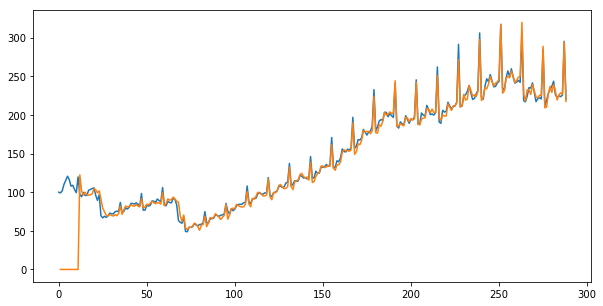

In [181]:
forecast = WintersMultModel(wage, 1, {'alpha': 0.6, 'beta': 1.0, 'seasonality_period': 12})

fig = plt.figure(figsize=(10, 5))

x = np.arange(0, len(wage), 1)

plt.plot(x, wage.iloc[x])
plt.plot(x, forecast[x])

plt.show()


В начале возникли какие-то проблемы, посмотрим, что в конце.

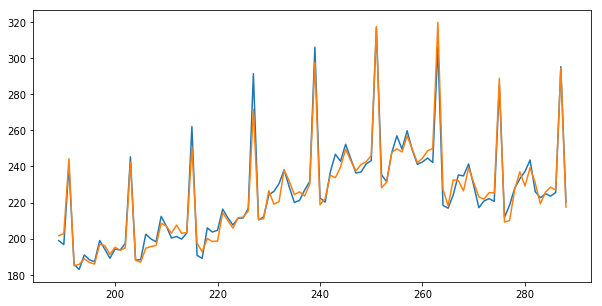

In [193]:
forecast = WintersMultModel(wage, 1, {'alpha': 0.6, 'beta': 1.0, 'seasonality_period': 12})

fig = plt.figure(figsize=(10, 5))

x = np.arange(0, len(wage), 1)

plt.plot(x[-100:], wage.iloc[x][-100:])
plt.plot(x[-100:], forecast[x][-100:])

plt.show()

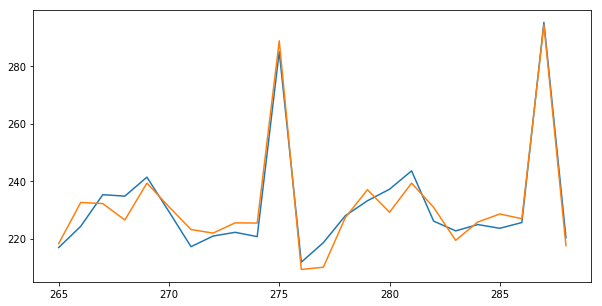

In [194]:
forecast = WintersMultModel(wage, 1, {'alpha': 0.6, 'beta': 1.0, 'seasonality_period': 12})

fig = plt.figure(figsize=(10, 5))

x = np.arange(0, len(wage), 1)

plt.plot(x[-24:], wage.iloc[x][-24:])
plt.plot(x[-24:], forecast[x][-24:])

plt.show()

In [195]:
forecast = WintersMultModel(wage, 1, {'alpha': 0.6, 'beta': 1.0, 'seasonality_period': 12})
print("Loss: ", ((np.array(wage.loc['2015-02-01':'2017-01-31']).ravel() - forecast[-24:]) ** 2).sum() ** 0.5)


Loss:  149.026164273


В целом получаем модели, которые в среднем работают с одинаковым качеством. (По крайней мере 3 последние)